# Python Basic x US Fed Tax

Unknown year Tax bracket

In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
tax_tbl = pd.read_csv('fed-tax-bracket.csv')
tax_tbl.head()

,Schedule,If your taxable income is: Over--,But not over--,The tax is:,Unnamed: 4
0,X,$-,"$11,000.00",10% of the amount over $0,NaN
1,X,"$11,000.00","$44,725.00","1,100.00 plus 12% of the amount over 11,000",NaN
2,X,"$44,725.00","$95,375.00","5,147.00 plus 22% of the amount over 44,725",NaN
3,X,"$95,375.00","$182,100.00","16,290.00 plus 24% of the amount over 95,375",NaN
4,X,"$182,100.00","$231,250.00","37,104.00 plus 32% of the amount over 182,100",NaN


In [3]:
tax_tbl.isnull().sum()

Schedule                                0
 If your taxable income is: Over--      0
 But not over--                         0
The tax is:                             0
Unnamed: 4                             28
dtype: int64

In [4]:
tax_tbl.drop(['Unnamed: 4'], axis = 1, inplace = True)
tax_tbl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Schedule                             28 non-null     object
 1    If your taxable income is: Over--   28 non-null     object
 2    But not over--                      28 non-null     object
 3   The tax is:                          28 non-null     object
dtypes: object(4)
memory usage: 1.0+ KB


### Data Processing

In [5]:
tax_tbl.columns = ['schedule', 'lower','upper', 'calculation_rule']
tax_tbl

,schedule,lower,upper,calculation_rule
0,X,$-,"$11,000.00",10% of the amount over $0
1,X,"$11,000.00","$44,725.00","1,100.00 plus 12% of the amount over 11,000"
2,X,"$44,725.00","$95,375.00","5,147.00 plus 22% of the amount over 44,725"
3,X,"$95,375.00","$182,100.00","16,290.00 plus 24% of the amount over 95,375"
4,X,"$182,100.00","$231,250.00","37,104.00 plus 32% of the amount over 182,100"
5,X,"$231,250.00","$578,125.00","52,832.00 plus 35% of the amount over 231,250"
6,X,"$578,125.00",inf,"174,238.25 plus 37% of the amount over 578,125"
7,Y1,$-,"$22,000.00",10% of the amount over $0
8,Y1,"$22,000.00","$89,450.00","2,200.00 plus 12% of the amount over 22,000"
9,Y1,"$89,450.00","$190,750.00","10,294.00 plus 22% of the amount over 89,450"


In [6]:
def dollar_limit(dollar_series):
    if (dollar_series.strip() == 'no limit')|(dollar_series == 'inf'):
        return np.inf
    return dollar_series.replace('$','').replace(',','')

def pct(col):
    # Define the regex pattern
    p0 = re.compile(r'(?P<amount>\d+.\d+) plus (?P<pct>\d+)')
    if p0.search(col) == None:
        p1 = re.compile(r'^(?P<pct>\d+)')
        return p1.search(col).groupdict()
    return p0.search(col).groupdict()


tax_tbl['lower'] = tax_tbl['lower'].apply(dollar_limit)
tax_tbl['upper'] = tax_tbl['upper'].apply(dollar_limit)

tax_tbl['extract'] = tax_tbl['calculation_rule'].apply(dollar_limit).apply(pct)

# Expand the dictionaries in column 'extract' into separate columns
df_expanded = pd.json_normalize(tax_tbl['extract'])

tax_tbl = pd.concat([tax_tbl, df_expanded], axis=1)
tax_tbl.head()

,schedule,lower,upper,calculation_rule,extract,pct,amount
0,X,-,11000.00,10% of the amount over $0,{'pct': '10'},10,NaN
1,X,11000.00,44725.00,"1,100.00 plus 12% of the amount over 11,000","{'amount': '1100.00', 'pct': '12'}",12,1100.00
2,X,44725.00,95375.00,"5,147.00 plus 22% of the amount over 44,725","{'amount': '5147.00', 'pct': '22'}",22,5147.00
3,X,95375.00,182100.00,"16,290.00 plus 24% of the amount over 95,375","{'amount': '16290.00', 'pct': '24'}",24,16290.00
4,X,182100.00,231250.00,"37,104.00 plus 32% of the amount over 182,100","{'amount': '37104.00', 'pct': '32'}",32,37104.00


In [7]:
tax_tbl.fillna(0, inplace = True)
tax_tbl.drop(['calculation_rule','extract'], axis = 1, inplace = True)
tax_tbl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   schedule  28 non-null     object
 1   lower     28 non-null     object
 2   upper     28 non-null     object
 3   pct       28 non-null     object
 4   amount    28 non-null     object
dtypes: object(5)
memory usage: 1.2+ KB


In [8]:
tax_tbl['lower'] = tax_tbl['lower'].apply(lambda x: 0 if '-' in x else x)

In [9]:
tax_tbl = tax_tbl.astype({'lower':'float','upper':'float', 'pct':'int', 'amount':'float'})
tax_tbl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   schedule  28 non-null     object 
 1   lower     28 non-null     float64
 2   upper     28 non-null     float64
 3   pct       28 non-null     int32  
 4   amount    28 non-null     float64
dtypes: float64(3), int32(1), object(1)
memory usage: 1.1+ KB


In [10]:
def tax_owe(income, tax_tbl, schd = 'X'):
    bracket = tax_tbl[(tax_tbl['lower']< income) & (tax_tbl['upper'] >= income) & (tax_tbl['schedule'] == schd) ]
    tax = bracket['amount']+bracket['pct']*income/100
    return tax.iloc[0]

In [11]:
tax_owe(100000,tax_tbl,'Y1')

32294.0

In [12]:
incomes = list(range(600, 800000,1000))
len(incomes)

800

In [13]:
%%time
df = pd.DataFrame()
df['income'] = incomes
# income = adjusted gross income
for schedule in ['X','Y1','Y2','Z']:
    df[schedule] = df['income'].apply(lambda row: tax_owe(row, tax_tbl, schedule))

CPU times: total: 1.28 s
Wall time: 1.4 s


In [14]:
df.head()

,income,X,Y1,Y2,Z
0,600,60.0,60.0,60.0,60.0
1,1600,160.0,160.0,160.0,160.0
2,2600,260.0,260.0,260.0,260.0
3,3600,360.0,360.0,360.0,360.0
4,4600,460.0,460.0,460.0,460.0


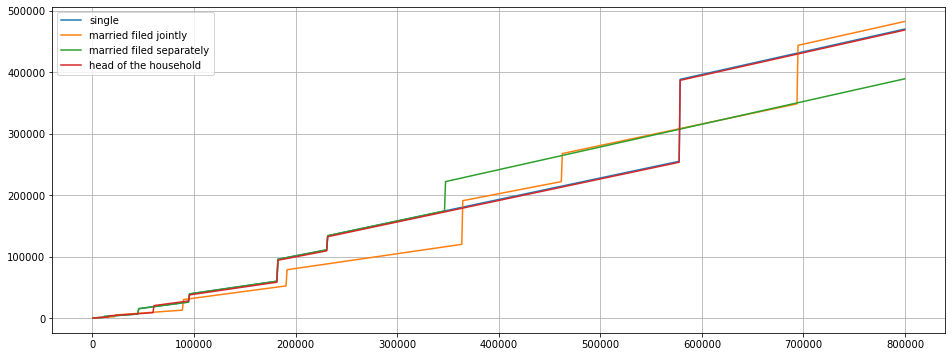

In [15]:
fig, ax = plt.subplots(figsize = (16,6)) 
plt.plot(df['income'],df['X'])
plt.plot(df['income'],df['Y1'])
plt.plot(df['income'],df['Y2'])
plt.plot(df['income'],df['Z'])
plt.legend(['single', 'married filed jointly', 'married filed separately', 'head of the household'])
plt.grid()

In [16]:
inc = list(range(600,800000,10000))
sep_inc = pd.DataFrame()
sep_inc['inc'] = inc
sep_inc['tmp'] = 1
df_sep_inc = pd.merge(sep_inc,sep_inc, on = 'tmp').drop(['tmp'], axis = 1)
df_sep_inc = df_sep_inc[(df_sep_inc['inc_x'] - df_sep_inc['inc_y']) >= 0]
df_sep_inc

,inc_x,inc_y
0,600,600
80,10600,600
81,10600,10600
160,20600,600
161,20600,10600
...,...,...
6395,790600,750600
6396,790600,760600
6397,790600,770600
6398,790600,780600


In [17]:
df_sep_inc['total_taxable_inc'] = df_sep_inc['inc_x'] + df_sep_inc['inc_y']
df_sep_inc['joint'] =  df_sep_inc['total_taxable_inc'].apply(lambda row: tax_owe(row, tax_tbl, 'Y1'))
df_sep_inc['x_tax'] =  df_sep_inc['inc_x'].apply(lambda row: tax_owe(row, tax_tbl, 'Y2'))
df_sep_inc['y_tax'] =  df_sep_inc['inc_y'].apply(lambda row: tax_owe(row, tax_tbl, 'Y2'))
df_sep_inc['total_separate_tax'] = df_sep_inc['x_tax'] + df_sep_inc['y_tax']
df_sep_inc

,inc_x,inc_y,total_taxable_inc,joint,x_tax,y_tax,total_separate_tax
0,600,600,1200,120.0,60.00,60.00,120.0
80,10600,600,11200,1120.0,1060.00,60.00,1120.0
81,10600,10600,21200,2120.0,1060.00,1060.00,2120.0
160,20600,600,21200,2120.0,3572.00,60.00,3632.0
161,20600,10600,31200,5944.0,3572.00,1060.00,4632.0
...,...,...,...,...,...,...,...
6395,790600,750600,1541200,756845.5,385822.75,371022.75,756845.5
6396,790600,760600,1551200,760545.5,385822.75,374722.75,760545.5
6397,790600,770600,1561200,764245.5,385822.75,378422.75,764245.5
6398,790600,780600,1571200,767945.5,385822.75,382122.75,767945.5


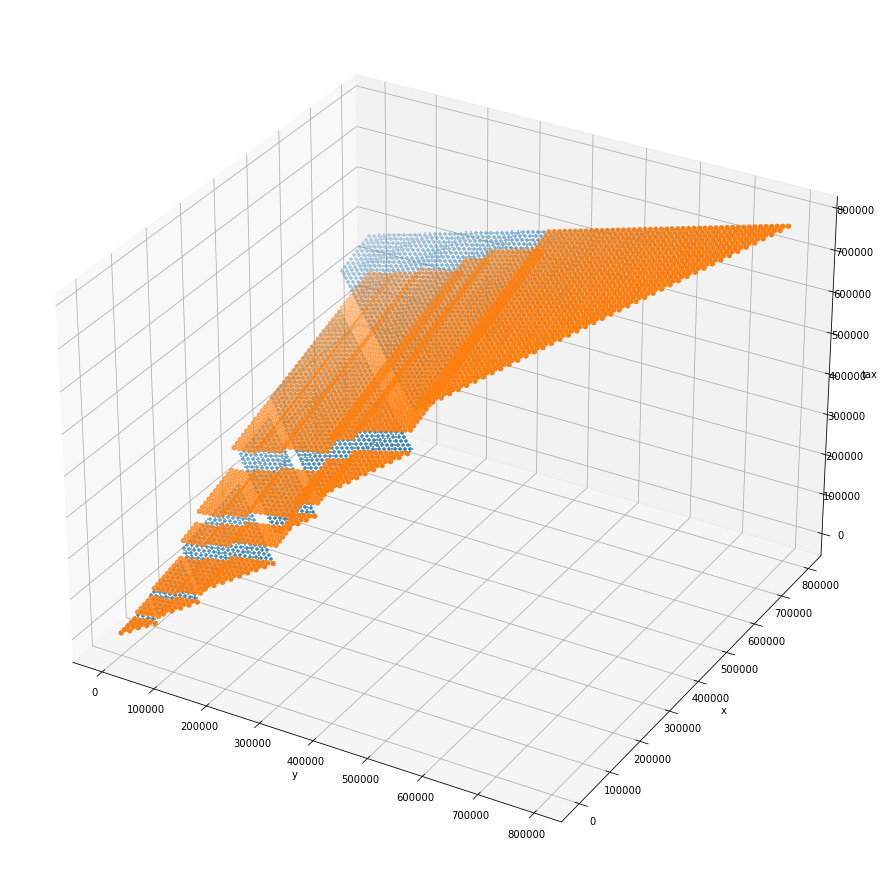

In [36]:
y = df_sep_inc['inc_x']
x = df_sep_inc['inc_y']
z1 = df_sep_inc['total_separate_tax']
z2 = df_sep_inc['joint']

fig = plt.figure(figsize = (26,16))
ax = fig.add_subplot(111, projection='3d')
 
# syntax for plotting
ax.scatter(x, y, z2, marker = '+')
ax.scatter(x, y, z1)

ax.set_xlabel('y')
ax.set_ylabel('x')
ax.set_zlabel('tax')

plt.show()

In [19]:
df_sep_inc['diff'] = df_sep_inc['joint'] - df_sep_inc['total_separate_tax']

In [20]:
comp = df_sep_inc[df_sep_inc['diff'] < 0]

In [21]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 160 to 5520
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inc_x               510 non-null    int64  
 1   inc_y               510 non-null    int64  
 2   total_taxable_inc   510 non-null    int64  
 3   joint               510 non-null    float64
 4   x_tax               510 non-null    float64
 5   y_tax               510 non-null    float64
 6   total_separate_tax  510 non-null    float64
 7   diff                510 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 35.9 KB


In [22]:
comp.sort_values(by='diff')

,inc_x,inc_y,total_taxable_inc,joint,x_tax,y_tax,total_separate_tax,diff
2880,360600,600,361200,119268.0,226722.75,60.0,226782.75,-107514.75
2800,350600,600,351200,116868.0,223022.75,60.0,223082.75,-106214.75
2801,350600,10600,361200,119268.0,223022.75,1060.0,224082.75,-104814.75
2090,260600,100600,361200,119268.0,144042.00,40434.0,184476.00,-65208.00
2010,250600,100600,351200,116868.0,140542.00,40434.0,180976.00,-64108.00
...,...,...,...,...,...,...,...,...
3852,480600,120600,601200,316084.0,271122.75,45234.0,316356.75,-272.75
4253,530600,130600,661200,337084.0,289622.75,47634.0,337256.75,-172.75
3371,420600,110600,531200,291584.0,248922.75,42834.0,291756.75,-172.75
5040,630600,600,631200,326584.0,326622.75,60.0,326682.75,-98.75


C:\Users\hdang\AppData\Local\Temp\ipykernel_9556\110961433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp['inc_diff'] = comp['inc_x'] - comp['inc_y']


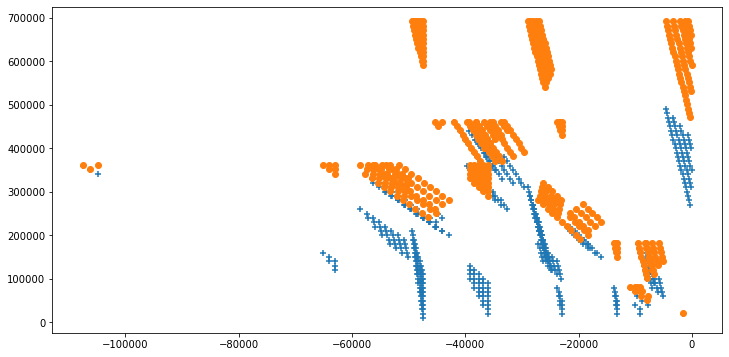

In [28]:
comp['inc_diff'] = comp['inc_x'] - comp['inc_y']

fig2,ax2 = plt.subplots(figsize=(12,6))
ax2.scatter(comp['diff'],comp['inc_diff'], marker = '+')
ax2.scatter(comp['diff'],comp['total_taxable_inc'])